---
title: Introduction to Plotting
jupyter:
  jupytext:
    text_representation:
      extension: .qmd
      format_name: quarto
      format_version: '1.0'
      jupytext_version: 1.16.4
  kernelspec:
    display_name: biotech
    language: python
    name: python3
---


In this tutorial, you will be walked through two different types of plots;
scatterplots and barplots. You will be using the data files from the last
session (002_DataTypes).

These plots are simple to generate in Python and can be easily customised.

__Notes__:
1) `fig` = the figure/plot object. Can be thought of as a page in a book.
2) `ax1` = an axis object. Defines a single plot within a `fig`.
3) `plt` = the toolbox you use to draw things on the page.

*Last edited: Isabella Casini and Justin Chitpin,  26.05.2025*


In [1]:
# import relevant packages (entire line is commented out)

import pandas as pd # call pandas "pd" for short (midline comment)
import numpy as np
import openpyxl

import matplotlib.pyplot as plt # import pyplot from matplotlib and call it "plt"

## Import data files

*Not sure how to do this, look at lesson 002_DataTypes.*

In [6]:
# Reading in an excel file (make sure to use the correct path)
pathxls = r"C:\Users\uqkmuroi\gitcode\Torch-Practice\fake_gdcw_growth_data_pivoted.xlsx"
df = pd.read_excel(pathxls, sheet_name='Growth_Data', header=0, index_col=0) # can select sheet name
print(df)

        Strain_A-Rep1  Strain_A-Rep2  Strain_A-Rep3  Strain_B-Rep1  \
Time_h                                                               
0               0.052         -0.068         -0.030          0.039   
1               0.060         -0.020          0.085          0.096   
2               0.190          0.129          0.127          0.123   
3               0.431          0.304          0.340          0.212   
4               0.711          0.738          0.693          0.381   
5               1.238          1.205          1.343          0.590   
6               1.856          1.707          1.777          0.964   
7               2.184          2.219          2.092          1.313   
8               2.319          2.331          2.384          1.657   
9               2.461          2.437          2.372          1.799   
10              2.449          2.401          2.483          1.797   
11              2.465          2.462          2.391          1.958   
12              2.50

## Find the averages (arithmetric mean) and standard deviations by strain

*Hint: Create new columns for each strain.*

*https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html*
*https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html*

In [7]:
df['A_Avg'] = df[['Strain_A-Rep1', 'Strain_A-Rep2', 'Strain_A-Rep3']].mean(axis=1)  # Calculate average for A
df['A_Std'] = df[['Strain_A-Rep1', 'Strain_A-Rep2', 'Strain_A-Rep3']].std(axis=1)  # Calculate standard deviation for A

df['B_Avg'] = df[['Strain_B-Rep1', 'Strain_B-Rep2', 'Strain_B-Rep3']].mean(axis=1)  # Calculate average for B
df['B_Std'] = df[['Strain_B-Rep1', 'Strain_B-Rep2', 'Strain_B-Rep3']].std(axis=1)  # Calculate standard deviation for B

In [8]:
print(df)

        Strain_A-Rep1  Strain_A-Rep2  Strain_A-Rep3  Strain_B-Rep1  \
Time_h                                                               
0               0.052         -0.068         -0.030          0.039   
1               0.060         -0.020          0.085          0.096   
2               0.190          0.129          0.127          0.123   
3               0.431          0.304          0.340          0.212   
4               0.711          0.738          0.693          0.381   
5               1.238          1.205          1.343          0.590   
6               1.856          1.707          1.777          0.964   
7               2.184          2.219          2.092          1.313   
8               2.319          2.331          2.384          1.657   
9               2.461          2.437          2.372          1.799   
10              2.449          2.401          2.483          1.797   
11              2.465          2.462          2.391          1.958   
12              2.50

## Plot the averages for each strain as scatter plot

### Play with the markers, lines, colours, and labels.

*Line styles: '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'*

*Markers: https://matplotlib.org/stable/api/markers_api.html*

*Colours: try the Google colour picker (just Google "colour picker"). You can even use HEX and RGB colour codes*
*https://matplotlib.org/stable/users/explain/colors/colors.html*

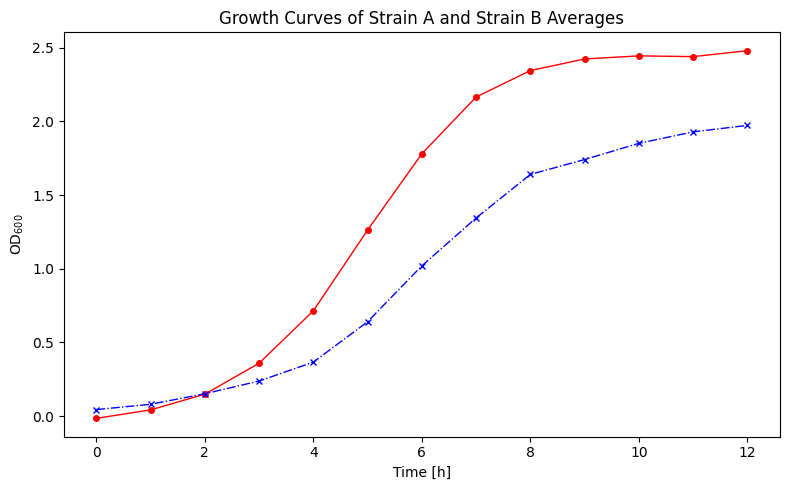

In [10]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5)) # inches

# Plot Strain A (OD600)
ax1.plot(df.index, df["A_Avg"],
         color="red",
         label="Strain A",
         marker = 'o',
         markersize = 4,
         linewidth=1,
         linestyle='-')
# Plot Strain B (OD600)
ax1.plot(df.index, df["B_Avg"],
         color="blue",
         label="Strain B",
         marker = 'x',
         markersize = 4,
         linewidth=1,
         linestyle='-.')

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$", color="black") # format for subscript 600

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages")

# Cleans up the layout
fig.tight_layout()

# Shows the plot
plt.show()

## Add in error bars using the STD and a legend

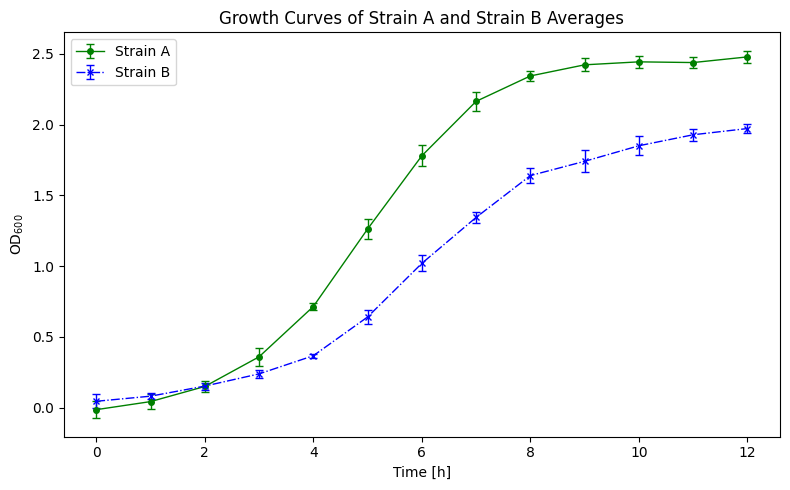

In [11]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

# Plot Strain A (OD600) with error bars
ax1.errorbar(df.index, df["A_Avg"], yerr=df["A_Std"], 
             color="green",
             label="Strain A",
             marker='o',
             markersize=4,
             linewidth=1,
             linestyle='-',
             capsize=3)

# Plot Strain B (OD600) with error bars
ax1.errorbar(df.index, df["B_Avg"], yerr=df["B_Std"],
             color="blue",
             label="Strain B",
             marker='x',
             markersize=4,
             linewidth=1,
             linestyle='-.',
             capsize=3)

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$", color="black")

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B Averages")

# Add legend
ax1.legend()

# Clean up the layout
fig.tight_layout()

# Show the plot
plt.show()

## Change the y-axis to be log and add a vertical line

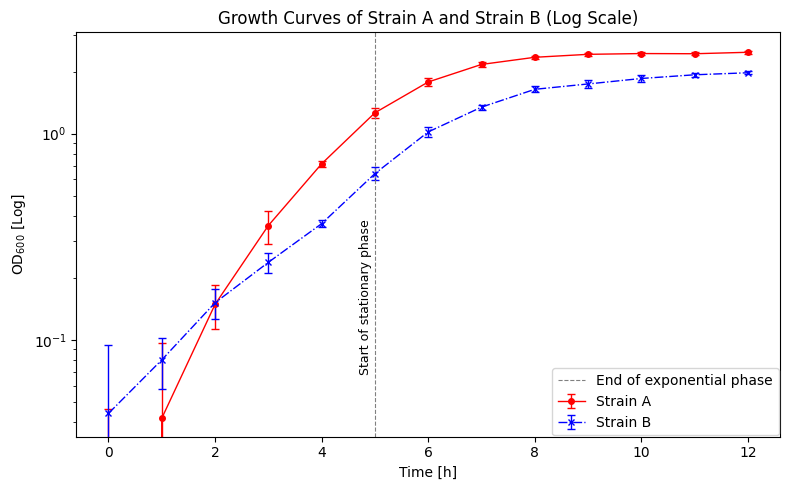

In [46]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(8, 5))  # inches

# Plot Strain A (OD600) with error bars
ax1.errorbar(df.index, df["A_Avg"], yerr=df["A_Std"],
             color="red",
             label="Strain A",
             marker='o',
             markersize=4,
             linewidth=1,
             linestyle='-',
             capsize=3)

# Plot Strain B (OD600) with error bars
ax1.errorbar(df.index, df["B_Avg"], yerr=df["B_Std"],
             color="blue",
             label="Strain B",
             marker='x',
             markersize=4,
             linewidth=1,
             linestyle='-.',
             capsize=3)

# Set axes labels
ax1.set_xlabel("Time [h]")
ax1.set_ylabel("OD$_{600}$ [Log]", color="black")

# Set log scale on y-axis
ax1.set_yscale('log')

# add vertical line
ax1.axvline(x=5, color='gray',
            linestyle='--', linewidth=0.8,
            label='End of exponential phase')
ax1.text(5-0.3, 0.07,
         'Start of stationary phase',
         color='black',
         fontsize=9,
         rotation=90,
         ha='left')  # Adjust the position of labels

# Add a title
ax1.set_title("Growth Curves of Strain A and Strain B (Log Scale)")

# Add legend
ax1.legend(bbox_to_anchor=(1, 0),
           loc='lower right',
           borderaxespad=0.1) # play with these values (they are optional)

# Clean up the layout
fig.tight_layout()

# Show the plot (collects everything you've prepared and pops it on screen.)
#plt.show()